In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt
from scipy.stats import norm

In [4]:
# custom libs
import sys
sys.path.append("../..") # se subir de pasta, "../" em vez de "../.../"

from src.libs.dynamicFPC import W_dFPC

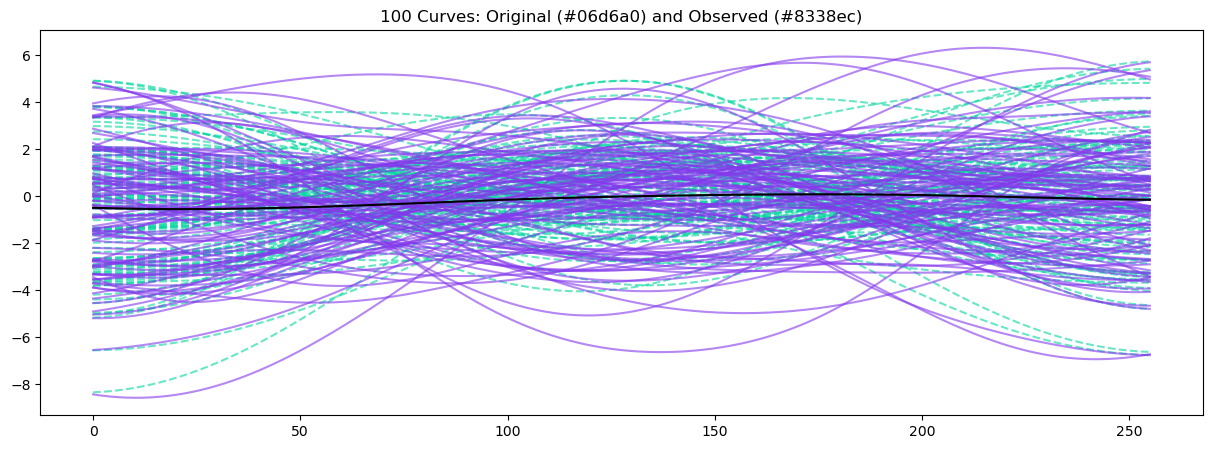

In [7]:
# Simulação

# PARÂMETROS
n = 100          # sample size (curves)
d = 2            # dimension parameter
nt = 256         # number of grid points
u = np.linspace(0.01, 0.99, nt)[:, None]  # nt x 1 grid
N = 3            # wavelet decomposition level

# PROCESSO ARIMA PARA DINÂMICAS FUNCIONAIS NÃO OBSERVADAS

def simulate_ar1(phi, n, sigma2=1.5):
    x = np.zeros(n)
    eps = np.random.normal(scale=np.sqrt(sigma2), size=n)
    for t in range(1, n):
        x[t] = phi * x[t-1] + eps[t]
    return x

xi1 = simulate_ar1(-0.65, n)
xi2 = simulate_ar1( 0.40, n)

# GERA DADOS FUNCIONAIS NÃO OBSERVADOS, X(t)

X = np.zeros((nt, n))

for ii in range(n):
    X[:, ii] = (
        xi1[ii] * np.sqrt(2) * np.cos(np.pi * u[:, 0]) +
        xi2[ii] * np.sqrt(2) * np.cos(2 * np.pi * u[:, 0])
    )


# ADICIONA RUIDO À SÉRIE DE SENO 
mEps = np.zeros((nt, n))

for ii in range(n):
    for jj in range(1, 11):
        mEps[:, ii] += (
            norm.rvs(scale=1.0) * np.sqrt(2) *
            np.sin(np.pi * u[:, 0] * jj) / (2 ** (jj - 1))
        )

# DADOS FUNCIONAIS OBSERVADOS: Y(t) = X(t) + epsilon(t)
Y = X + mEps


plt.figure(figsize=(15,5))


color_original = "#06d6a0"
plt.plot(X, alpha=.6, c=color_original, linestyle="--",label="Unobserved")

color_observed = "#8338ec"
plt.plot(Y, alpha=.6, c=color_observed, label="Observed")

plt.plot(np.mean(Y,axis=1), c="black")

plt.title(f"{n} Curves: Original ({color_original}) and Observed ({color_observed})")

plt.show()

In [8]:
n = 100          # sample size (curves)
d = 2            # dimension parameter
nt = 256         # number of grid points
u = np.linspace(0.01, 0.99, nt)[:, None]  # nt x 1 grid
N = 3            # wavelet decomposition level

eigenvalues_B, eigenvectors_B = W_dFPC(Y, nt, N)

c:\Users\user\anaconda3\envs\densities4risk\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\user\anaconda3\envs\densities4risk\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


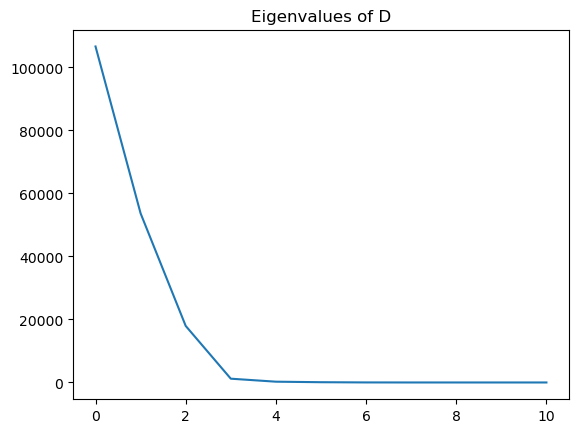

In [9]:
plt.figure()

plt.plot(eigenvalues_B[:11])

plt.title("Eigenvalues of D")

plt.show()

In [10]:
# proportion of the total eigenvalue mass contained in the first 4 eigenvalues
print(np.linalg.norm(eigenvalues_B[:4], 1) / np.linalg.norm(eigenvalues_B, 1))

0.9980202137609148


In [ ]:
#C:\Users\user\Projetos\densities4risk\resources\wavelet_estimation_fonseca\Fertilidade_Australia\03\Autralia_Fert_Rate_WavDimEst.m

# h1_hat =  waverec(B(:,1),Lw,wname);
# h2_hat =  waverec(B(:,2),Lw,wname);
# h3_hat =  waverec(B(:,3),Lw,wname);
# h4_hat =  waverec(B(:,4),Lw,wname);
# h5_hat =  waverec(B(:,5),Lw,wname);


# p = 5;  % lag máximo utilizado
# vw = [.1,.3,.5]'; % vetor de pesos
# %vw = vw/norm(vw);
# delta = length(vw); % número de pesos usados
# nt = 1000;  % número de pontos usados para cada ano
# u = linspace(13,52,nt);  % nt valores igualmente espaçados de 13 a 52
# du = u(2) - u(1);
# SmoLogFertRate = zeros(nt,n);
# for k=2:91
#     fspl = fit(logFerRate(2:10,1),logFerRate(2:10,k),'smoothingspline');
#     SmoLogFertRate(:,(k-1)) = fspl(u);
# end

# % esse vetor terá a média de um determinado coeficiente
# % ao longo dos n dias
# mu_dec = mean(SmoLogFertRate,2);

# % matriz com os desvios dos coeficientes em relação à
# % média dos coeficientes num mesmo dia
# C = SmoLogFertRate - mu_dec*ones(1,n);

# % funcional observado centrado
# mat_G = du*(C'*C);

# % matriz com os produtos internos dos funcionais centrados multiplicados
# % pelos pesos
# Zk = zeros(n-p-delta+1,n-p-delta+1,p-delta+1);
# for k=delta:(p-delta+1)
#     mat_Z = FuncMatProdYcentAggregVet( C, vw, p, k);
#     Zk(:,:,k) = du*mat_Z;
# end